In [1]:
import utils.dataloader as dl
train_loader, val_loader = dl.load_data("/Users/ifigeneiastathaki/Desktop/projects/CS273_project/data/training_set_unmasked", batch_size=32, val_split=0.2)

Classes: ['benign_unmasked', 'malignant_unmasked']
Total images: 547 | Training: 437 | Validation: 110


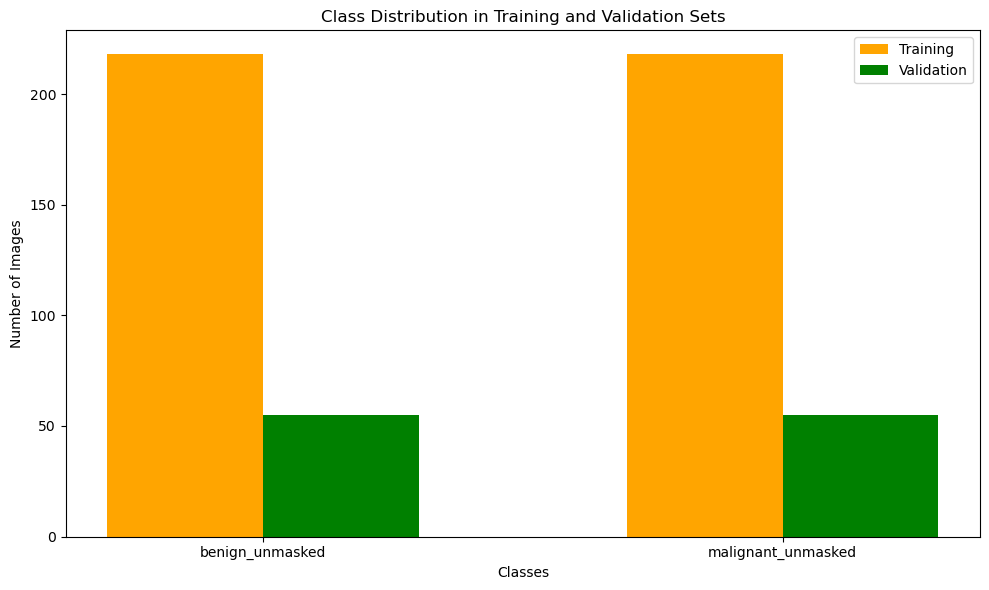

In [2]:
import matplotlib.pyplot as plt

classes = ['benign_unmasked', 'malignant_unmasked']
total_images = 547
training_images = 437
validation_images = 110

# Values for each class
class_counts = {'benign_masked': {'total': 0, 'training': 0, 'validation': 0},
                'malignant_masked': {'total': 0, 'training': 0, 'validation': 0}}

class_counts['benign_masked']['total'] = total_images // 2
class_counts['malignant_masked']['total'] = total_images // 2
class_counts['benign_masked']['training'] = training_images // 2
class_counts['malignant_masked']['training'] = training_images // 2
class_counts['benign_masked']['validation'] = validation_images // 2
class_counts['malignant_masked']['validation'] = validation_images // 2

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.3
index = range(len(classes))

ax.bar(index, [class_counts['benign_masked']['training'], class_counts['malignant_masked']['training']],
       bar_width, label='Training', color='orange')
ax.bar([i + bar_width for i in index], [class_counts['benign_masked']['validation'], class_counts['malignant_masked']['validation']],
       bar_width, label='Validation', color='green')

ax.set_xlabel('Classes')
ax.set_ylabel('Number of Images')
ax.set_title('Class Distribution in Training and Validation Sets')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

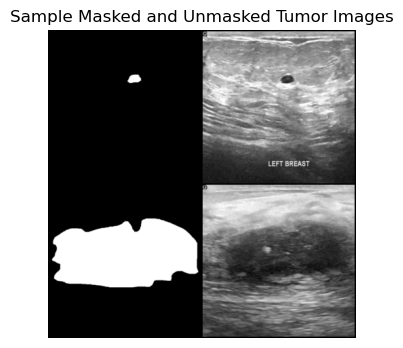

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from PIL import Image
import os

# Load example images (replace with actual file paths)
image_paths = ["/Users/ifigeneiastathaki/Desktop/projects/CS273_project/data/training_set_masked/benign_masked/benign (1)_mask.png", "/Users/ifigeneiastathaki/Desktop/projects/CS273_project/data/training_set_unmasked/benign_unmasked/benign (1).png", "/Users/ifigeneiastathaki/Desktop/projects/CS273_project/data/training_set_masked/malignant_masked/malignant (1)_mask.png", "/Users/ifigeneiastathaki/Desktop/projects/CS273_project/data/training_set_unmasked/malignant_unmasked/malignant (1).png"]
images = [Image.open(img).convert("L") for img in image_paths]

# Define transformation (resize to match model input)
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

# Apply transformation
images = [transform(img) for img in images]
grid = make_grid(images, nrow=2, normalize=True)

# Plot
plt.figure(figsize=(8, 4))
plt.imshow(grid.permute(1, 2, 0), cmap="gray")
plt.axis("off")
plt.title("Sample Masked and Unmasked Tumor Images")
plt.show()

In [4]:
from utils import model as m
from utils.model import train_cnn
import utils.model as um


trained_model= train_cnn(train_loader)

Loading BokehJS ...

Epoch [1/10] - Train Loss: 1.4083, Train Acc: 62.70%
Epoch [2/10] - Train Loss: 0.5751, Train Acc: 73.46%
Epoch [3/10] - Train Loss: 0.5096, Train Acc: 75.74%
Epoch [4/10] - Train Loss: 0.4687, Train Acc: 75.06%
Epoch [5/10] - Train Loss: 0.4275, Train Acc: 80.09%
Epoch [6/10] - Train Loss: 0.4005, Train Acc: 83.07%
Epoch [7/10] - Train Loss: 0.3603, Train Acc: 83.75%
Epoch [8/10] - Train Loss: 0.3333, Train Acc: 85.35%
Epoch [9/10] - Train Loss: 0.2622, Train Acc: 89.47%
Epoch [10/10] - Train Loss: 0.1980, Train Acc: 92.68%


Training complete!


In [9]:
test= m.test_model(trained_model,val_loader)

Validation Accuracy: 84.55%
Precision: 0.8000, Recall: 0.6250, F1 Score: 0.7018, ROC AUC: 0.8341
